This notebook aims to provide some intuition of how data generated with a different sampling schemes look like.

For actual data generation, please refer to the "Data Generation" notebook.

In [2]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 

from src.datasets import configs, data
from utils.plotting_utils import plot_random_dataset_images

`configs.SpriteWorldConfig` is a class that allows to define the parameters of the dataset generation.
You can create your own configuration by modifying the parameters of the class.
Check `/src/datasets/configs.py` for more details.

In [3]:
default_cfg = configs.SpriteWorldConfig()
default_cfg

SpriteWorldConfig(x=Range(min=0.1, max=0.9), y=Range(min=0.2, max=0.8), shape=['triangle', 'square'], scale=Range(min=0.09, max=0.22), angle=Range(min=0, max=0), c0=Range(min=0.05, max=0.95), c1=Range(min=1, max=1), c2=Range(min=1, max=1))

## Random Sampling

Generating images (sampling: random): 100%|██████████| 1000/1000 [00:03<00:00, 265.55it/s]


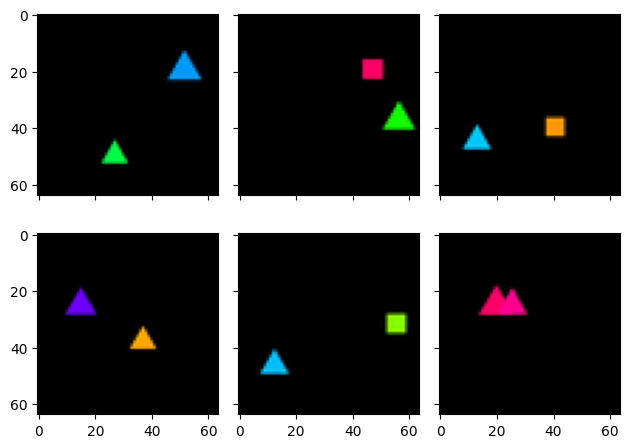

In [4]:
n_samples = 1000
n_slots = 2
sample_mode = "random"
random_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode)
plot_random_dataset_images(random_dataset)

## Diagonal Sampling

Generating images (sampling: diagonal): 100%|██████████| 1000/1000 [00:03<00:00, 254.53it/s]


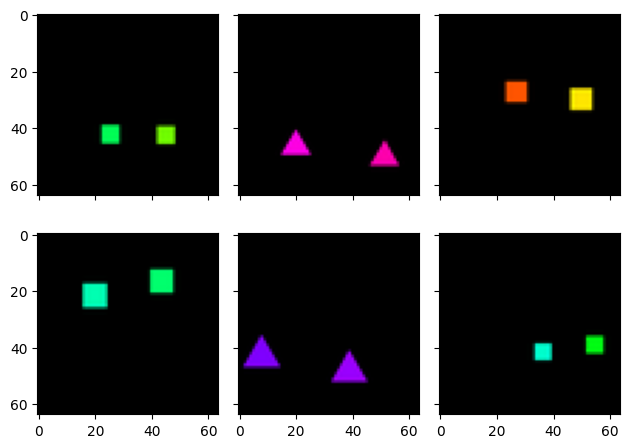

In [5]:
delta = 0.125
sample_mode = "diagonal"
n_slots = 2
n_samples = 1000
no_overlap = True
diagonal_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode, 
                                            no_overlap=no_overlap,
                                            delta=delta)
plot_random_dataset_images(diagonal_dataset)


## Off-Diagonal Sampling

Generating images (sampling: off_diagonal): 100%|██████████| 1000/1000 [00:03<00:00, 272.14it/s]


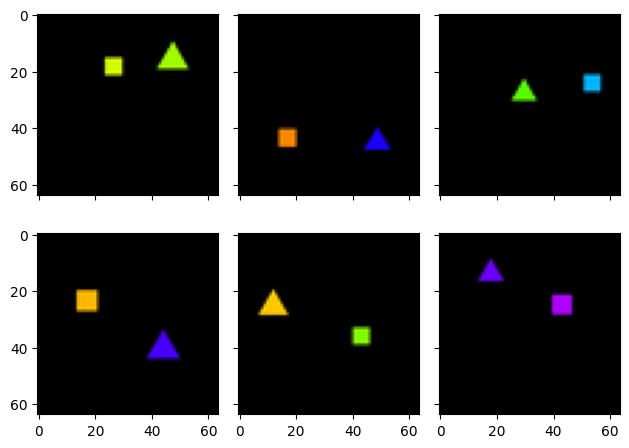

In [6]:
# Note: this is not a filtered dataset, so overlaps are in principle allowed
n_slots = 2
sample_mode = "off_diagonal"
delta = 0.125
n_samples = 1000

off_diagonal_dataset = data.SpriteWorldDataset(
    n_samples, n_slots, default_cfg, sample_mode=sample_mode, delta=delta
)
plot_random_dataset_images(off_diagonal_dataset)